### Credits: https://github.com/laxmimerit/NLP-Tutorials-with-HuggingFace

In [1]:
!pip install -U accelerate
!pip install -U transformers
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import neattext.functions as nfx
df = pd.read_csv("https://raw.githubusercontent.com/Enirys/rails-issues-data/main/rails_github_issues_dataset_clean.csv", usecols=["title", "body", "labels"])
df.head()

,title,labels,body
0,`find_by` is broken when passing an instance t...,"activerecord, attached PR, With reproduction s...",Big thanks for adding support for composite pr...
1,async_count returns a Integer instead of a Pro...,"activerecord, attached PR",### Steps to reproduce\r\n\r\nWhen being cache...
2,"API only, multi DB. Undefined method `id' for ...",more-information-needed,I am upgrading to 7.1.2 from 7.0.7.\r\nIt is a...
3,active_record_migrations.rb raises `Unknown mi...,ci issues,There is a CI failure at https://buildkite.com...
4,ActiveRecord 7.1 regression in model scoping i...,"activerecord, With reproduction steps",### Steps to reproduce\r\n<!-- (Guidelines for...


In [3]:
df['title_body'] = df['title'] + ' ' + df['body']
df.head()

,title,labels,body,title_body
0,`find_by` is broken when passing an instance t...,"activerecord, attached PR, With reproduction s...",Big thanks for adding support for composite pr...,`find_by` is broken when passing an instance t...
1,async_count returns a Integer instead of a Pro...,"activerecord, attached PR",### Steps to reproduce\r\n\r\nWhen being cache...,async_count returns a Integer instead of a Pro...
2,"API only, multi DB. Undefined method `id' for ...",more-information-needed,I am upgrading to 7.1.2 from 7.0.7.\r\nIt is a...,"API only, multi DB. Undefined method `id' for ..."
3,active_record_migrations.rb raises `Unknown mi...,ci issues,There is a CI failure at https://buildkite.com...,active_record_migrations.rb raises `Unknown mi...
4,ActiveRecord 7.1 regression in model scoping i...,"activerecord, With reproduction steps",### Steps to reproduce\r\n<!-- (Guidelines for...,ActiveRecord 7.1 regression in model scoping i...


In [4]:
df['title_body'] = df['title_body'].apply(lambda x: nfx.remove_stopwords(str(x).lower()))

In [5]:
df.head()

,title,labels,body,title_body
0,`find_by` is broken when passing an instance t...,"activerecord, attached PR, With reproduction s...",Big thanks for adding support for composite pr...,`find_by` broken passing instance uses composi...
1,async_count returns a Integer instead of a Pro...,"activerecord, attached PR",### Steps to reproduce\r\n\r\nWhen being cache...,async_count returns integer instead promise ##...
2,"API only, multi DB. Undefined method `id' for ...",more-information-needed,I am upgrading to 7.1.2 from 7.0.7.\r\nIt is a...,"api only, multi db. undefined method `id' {}:h..."
3,active_record_migrations.rb raises `Unknown mi...,ci issues,There is a CI failure at https://buildkite.com...,active_record_migrations.rb raises `unknown mi...
4,ActiveRecord 7.1 regression in model scoping i...,"activerecord, With reproduction steps",### Steps to reproduce\r\n<!-- (Guidelines for...,activerecord 7.1 regression model scoping call...


In [6]:
df.iloc[0].labels

'activerecord, attached PR, With reproduction steps'

In [7]:
df.shape
df.info()

df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       500 non-null    object
 1   labels      500 non-null    object
 2   body        500 non-null    object
 3   title_body  500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


0

<Axes: ylabel='Frequency'>

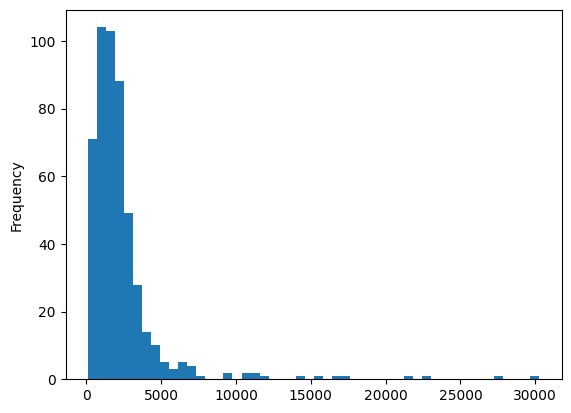

In [8]:
df['title_body'].str.len().plot.hist(bins=50)

In [9]:
df['labels'] = df['labels'].apply(lambda x: [label.strip() for label in x.split(',')])

In [10]:
#df['labels'] = df['labels'].apply(lambda labels: [label.replace(' ', '') for label in labels])

In [11]:
df['labels']

0      [activerecord, attached PR, With reproduction ...
1                            [activerecord, attached PR]
2                              [more-information-needed]
3                                            [ci issues]
4                [activerecord, With reproduction steps]
                             ...                        
495                            [more-information-needed]
496                          [activerecord, attached PR]
497                                      [activestorage]
498                               [stale, activestorage]
499                           [attached PR, actioncable]
Name: labels, Length: 500, dtype: object

In [12]:
label_counts = [l for lab in df['labels'] for l in lab]
pd.Series(label_counts).value_counts()

activerecord               241
attached PR                129
With reproduction steps    104
activesupport               46
stale                       39
actionpack                  33
more-information-needed     32
railties                    31
actionview                  29
docs                        24
ci issues                   22
activestorage               19
third party issue           17
good first issue            12
encryption                  12
regression                  10
PostgreSQL                  10
actioncable                  8
activejob                    8
activemodel                  6
pinned                       4
actionmailer                 3
actiontext                   3
engines                      3
MySQL                        2
i18n                         1
routing                      1
rails-ujs                    1
asset pipeline               1
duplicate                    1
dtype: int64

## Label Encoder

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer

In [14]:
multilabel = MultiLabelBinarizer()

labels = multilabel.fit_transform(df['labels']).astype('float32')

texts = df['title_body'].tolist()

In [15]:
len(labels[0])
texts[:5]

['`find_by` broken passing instance uses composite primary keys big thanks adding support composite primary keys. we’ve implemented seen big performance gains - we’re partitioned tables! however, `find_by` broken trying pass instance uses composite primary keys. ```ruby # frozen_string_literal: true require "bundler/inline" gemfile(true) source "https://rubygems.org" gem "activerecord", "7.1.2" gem "sqlite3" end require "active_record" require "minitest/autorun" require "logger" # connection database-independent bug reports. activerecord::base.establish_connection(adapter: "sqlite3", database: ":memory:") activerecord::base.logger = logger.new(stdout) activerecord::schema.define create_table :users, primary_key: [:id, :company_id], force: true |t| t.integer :id t.integer :company_id end create_table :profiles, primary_key: :id, force: true |t| t.integer :user_id t.integer :company_id end end class user < activerecord::base has_one :profile end class profile < activerecord::base belongs

## Model Building

In [16]:
import torch
from transformers import DistilBertTokenizer, AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [17]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels,
                                                                    test_size=0.2, random_state=42)



In [18]:
val_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [19]:
checkpoint = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=len(labels[0]),
                                                            problem_type="multi_label_classification")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
labels[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
# Lets build custom dataset
class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=128):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length", max_length=self.max_len, return_tensors='pt')

    return {
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'labels': label
    }



In [22]:
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer)

In [23]:
val_dataset[99]

{'input_ids': tensor([  101, 14593,  1035, 17961,  3957,  2139, 28139, 10719,  5432,  3573,
         12332, 15168,  1021,  1012,  1015, 25925, 10439, 15168,  1021,  1012,
          1014, 15168,  1021,  1012,  1015,  1045,  1005,  1049,  2893, 16234,
          1024,  2139, 28139, 10719,  5432,  1024,  2026,  5302,  9247,  2944,
         14593,  2229,  1036,  1056,  1036,  1010,  1036,  1056,  1036, 17961,
          1012,  3225, 15168,  1021,  1012,  1016,  1010, 14593,  1035, 17961,
          2512,  1011, 17961,  7889,  5333,  1012, 17961,  2215, 14593,  4225,
          3161,  2501,  3573,  1012,  5248,  3107, 10975,  1031,  4466,  2683,
          2581,  2475,  1033,  1006, 16770,  1024,  1013,  1013, 21025,  2705,
         12083,  1012,  4012,  1013, 15168,  1013, 15168,  1013,  4139,  1013,
          4466,  2683,  2581,  2475,  1007,  1012,  1001,  1001,  1001,  4084,
         21376,  1036,  1036,  1036, 10090,  1001,  7708,  1035,  5164,  1035,
         18204,  1024,  2995,  5478,  1

In [25]:
# Multi-Label Classification Evaluation Metrics
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, hamming_loss
from transformers import EvalPrediction
import torch


def multi_labels_metrics(predictions, labels, threshold=0.3):
  sigmoid = torch.nn.Sigmoid()
  probs = sigmoid(torch.Tensor(predictions))

  y_pred = np.zeros(probs.shape)
  y_pred[np.where(probs>=threshold)] = 1
  y_true = labels

  f1 = f1_score(y_true, y_pred, average = 'macro',zero_division=1)
  #roc_auc = roc_auc_score(y_true, y_pred, average = 'macro')
  hamming = hamming_loss(y_true, y_pred)

  metrics = {
      #"roc_auc": roc_auc,
      "hamming_loss": hamming,
      "f1": f1
  }

  return metrics

def compute_metrics(p:EvalPrediction):
  preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions

  result = multi_labels_metrics(predictions=preds,
                                labels=p.label_ids)

  return result

In [26]:
# Training Arguments
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    output_dir = './results',
    num_train_epochs=5,
    save_steps=1000,
    save_total_limit=2
)

trainer = Trainer(model=model,
                  args=args,
                  train_dataset=train_dataset,
                  eval_dataset = val_dataset,
                  compute_metrics=compute_metrics)

In [27]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=250, training_loss=0.21381629943847658, metrics={'train_runtime': 46.4448, 'train_samples_per_second': 43.062, 'train_steps_per_second': 5.383, 'total_flos': 66266772480000.0, 'train_loss': 0.21381629943847658, 'epoch': 5.0})

In [28]:
trainer.evaluate()

{'eval_loss': 0.16086244583129883,
 'eval_hamming_loss': 0.057,
 'eval_f1': 0.3216216216216216,
 'eval_runtime': 1.8905,
 'eval_samples_per_second': 52.897,
 'eval_steps_per_second': 6.877,
 'epoch': 5.0}

In [29]:
trainer.save_model("distilbert-finetuned-rails-multi-label")

In [30]:
import pickle
with open("multi-label-binarizer.pkl", "wb") as f:
  pickle.dump(multilabel, f)

In [31]:
!zip -r distilbert.zip "/content/distilbert-finetuned-rails-multi-label"

  adding: content/distilbert-finetuned-rails-multi-label/ (stored 0%)
  adding: content/distilbert-finetuned-rails-multi-label/model.safetensors (deflated 8%)
  adding: content/distilbert-finetuned-rails-multi-label/config.json (deflated 65%)
  adding: content/distilbert-finetuned-rails-multi-label/training_args.bin (deflated 51%)


# Predictions

In [32]:
from neattext.functions import clean_text

In [33]:
text = """
Update Rails security guide by removing SafeErb suggestion.
On the [security](http://guides.rubyonrails.org/security.html) section of the Rails guide, it can be read:\r\n\r\n"_However, it can easily happen that the programmer forgets to use it, so _it is recommended to use the SafeErb gem. SafeErb reminds you to escape strings from external sources._"\r\n\r\nThe repository of the gem [SafeErb](https://github.com/abedra/safe-erb) doesn\'t show activity since 2012. I think that is a good idea to remove the part where the recommendation to use this gem is mentioned.\r\n\r\nAlso one of the authors of the gem [recommend not to use it](https://github.com/abedra/safe-erb/issues/1).\r\n
"""

In [34]:
text_clean = clean_text(text,stopwords=True).lower()

In [35]:
text_clean

'update rails security guide removing safeerb suggestion. [security](http://guides.rubyonrails.org/security.html) section rails guide, read: "_however, easily happen programmer forgets use it, _it recommended use safeerb gem. safeerb reminds escape strings external sources._" repository gem [safeerb](https://github.com/abedra/safe-erb) activity 2012. think good idea remove recommendation use gem mentioned. authors gem [recommend use it](https://github.com/abedra/safe-erb/issues/1).'

In [36]:
encoding = tokenizer(text_clean, return_tensors='pt')
encoding.to(trainer.model.device)

outputs = trainer.model(**encoding)

In [37]:
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(outputs.logits[0].cpu())
preds = np.zeros(probs.shape)
preds[np.where(probs>=0.3)] = 1

multilabel.classes_

multilabel.inverse_transform(preds.reshape(1,-1))

[('activerecord',)]

In [ ]:
preds.reshape(1,-1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])